In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving disney_plus_titles.csv to disney_plus_titles.csv


In [21]:
df = pd.read_csv('disney_plus_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [22]:
df.shape

(1368, 12)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [24]:
df.describe()

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [25]:
df.isna().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [26]:
df.drop_duplicates(inplace=True)
df.shape

(1368, 12)

In [29]:
df['director'].fillna('None', inplace=True)
df['cast'].fillna('None', inplace=True)
df['country'].fillna('None', inplace=True)

In [30]:
df.dropna(inplace=True)

In [31]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [32]:
df.shape

(1363, 12)

In [33]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [34]:
# Extract year and month for trend analysis
df['year_month'] = df['date_added'].dt.to_period('M')

In [35]:
# Aggregate the number of titles added each month
monthly_titles = df.groupby('year_month').size()

In [46]:
data = df

In [43]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()
# Function to calculate sentiment scores
def get_sentiment(description):
    if isinstance(description, str):
        scores = sid.polarity_scores(description)
        return scores['compound']
    else:
        return None
df['sentiment'] = df['description'].apply(get_sentiment)
df[['title', 'description', 'sentiment']].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,title,description,sentiment
0,A Spark Story,Two Pixar filmmakers strive to bring their uni...,0.2263
1,Spooky Buddies,The puppies go on a spooky adventure through a...,-0.2023
2,The Fault in Our Stars,Hazel and Gus share a love that sweeps them on...,0.7506
3,Dog: Impossible,Matt Beisner uses unique approaches to modifyi...,0.0000
4,Spidey And His Amazing Friends,Spidey teams up with pals to become The Spidey...,0.0000


In [11]:
df = pd.DataFrame(df['release_year'])
df

,release_year
0,2021
1,2011
2,2014
3,2019
4,2021
...,...
1363,1963
1364,1965
1365,2014
1366,2016


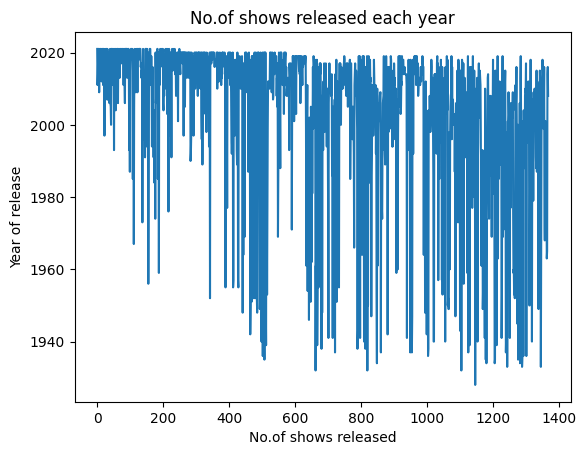

In [13]:
df['release_year'].plot(xlabel='No.of shows released', ylabel='Year of release')
plt.title('No.of shows released each year')
plt.show()

In [15]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# get the values
release_cycle, release_trend = hpfilter(df['release_year'], lamb = 1200)

In [16]:
release_cycle

0        3.647947
1       -6.421689
2       -3.494365
3        1.432231
4        3.363322
          ...    
1363   -28.301660
1364   -26.664858
1365    21.877599
1366    23.375806
1367    14.861629
Name: release_year_cycle, Length: 1368, dtype: float64

In [17]:
release_trend

0       2017.352053
1       2017.421689
2       2017.494365
3       2017.567769
4       2017.636678
           ...     
1363    1991.301660
1364    1991.664858
1365    1992.122401
1366    1992.624194
1367    1993.138371
Name: release_year_trend, Length: 1368, dtype: float64

In [18]:
df['Trend'] = release_trend

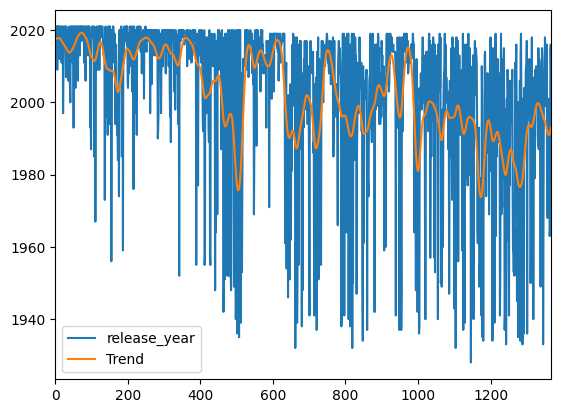

In [19]:
df[['release_year', 'Trend']].plot().autoscale(axis='x', tight=True)